<a href="https://colab.research.google.com/github/jjkcoding/US-Housing-Index-NSA-Analysis/blob/main/US_Index_NSA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description:
In this project, I viewed and analyzed housing prices of the United States of America by viewing a dataset of index nsa's. An index nsa is a measurement collected by the U.S. census division that is calculated based on location and single-family home prices. Using the index nsa, I was able to show how the housing prices are going up over time and display which states have the lowest and highest housing prices in 2021.  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import random

Importing dataset as a dataframe

In [ ]:
path = "/content/housing_data.csv"
all_house_dat = pd.read_csv(path)
all_house_dat

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.93,100.99
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.30,100.91
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.71,100.99
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.35
...,...,...,...,...,...,...,...,...,...,...
117274,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2020,3,170.13,170.65
117275,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2020,4,178.40,176.15
117276,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,1,187.65,193.76
117277,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,2,192.74,190.11


Importing calculation of the yearly mean index nsa for all states in the U.S. from sql table

In [7]:
path = "/content/yearly_housing_table.csv"
yearly_means = pd.read_csv(path)
yearly_means.head(10)

,yr,index_nsa
0,1975,63.097549
1,1976,67.181569
2,1977,74.228333
3,1978,84.234461
4,1979,95.475343
5,1980,102.066471
6,1981,105.816275
7,1982,107.489069
8,1983,113.898529
9,1984,119.216618


Plotting yearly average housing index nsa and showing how the housing index nsa in the U.S. has a positive trend over time

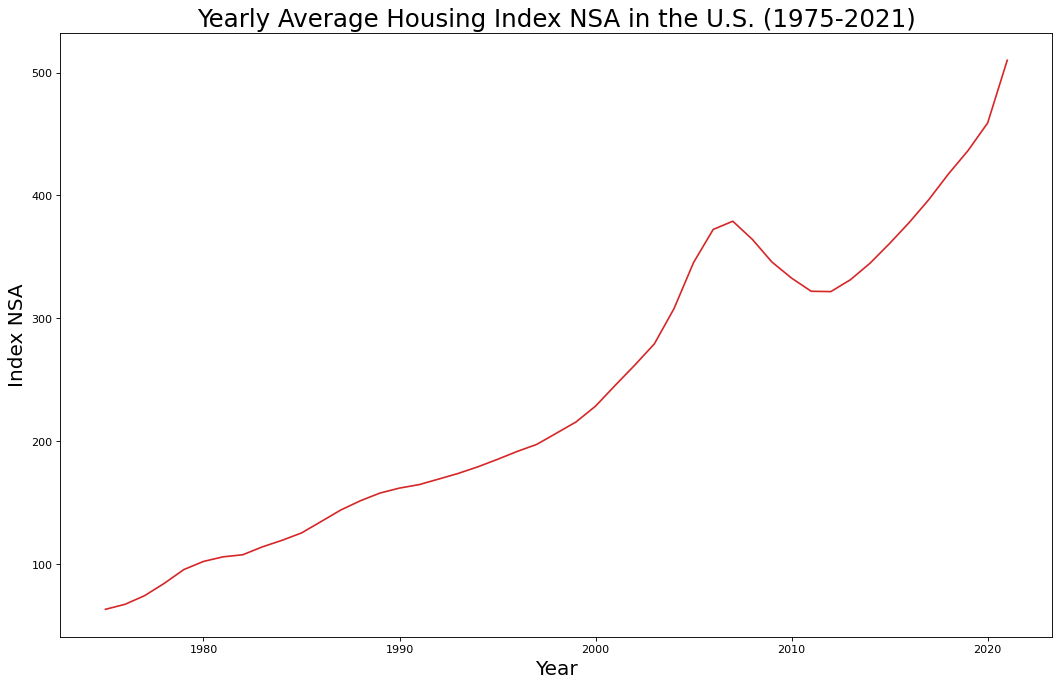

In [8]:
plt.figure(figsize=(16,10), dpi = 80)
plt.plot('yr', 'index_nsa', data=yearly_means, color='tab:red')

plt.title("Yearly Average Housing Index NSA in the U.S. (1975-2021)", fontsize = 22)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Index NSA", fontsize = 18)

plt.show()

Imported latest collected state index nsa data queried from SQL

In [9]:
path = "/content/latest_housing.csv"
latest_state_dat = pd.read_csv(path)
latest_state_dat.head(10)

,place_name,place_id,yr,period,index_nsa
0,District of Columbia,DC,2021,3,1016.68
1,Massachusetts,MA,2021,3,993.04
2,Washington,WA,2021,3,844.69
3,New York,NY,2021,3,841.13
4,California,CA,2021,3,800.74
5,Oregon,OR,2021,3,735.40
6,Rhode Island,RI,2021,3,733.44
7,Maine,ME,2021,3,727.59
8,Hawaii,HI,2021,3,724.19
9,Colorado,CO,2021,3,723.94


Plotting U.S. index nsa data by state to see the least and most expensive states. The plot shows that District of Columbia and Massachusetts have the highest housing prices, while West Virgina and Oklahoma have the lowest housing prices.

[]

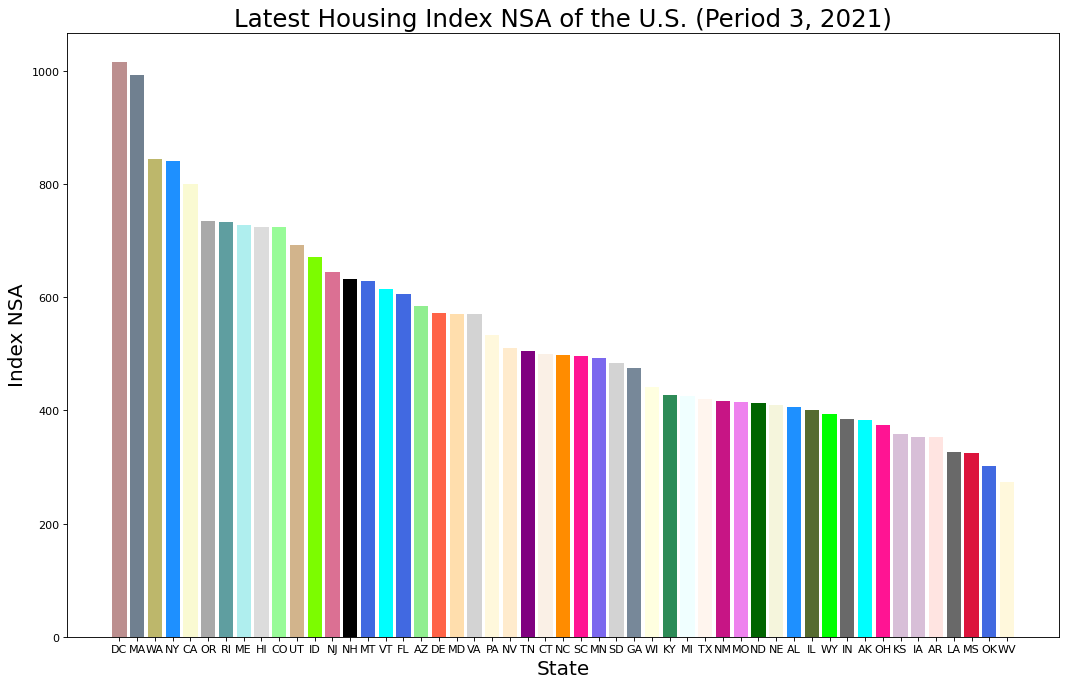

In [10]:
plt.figure(figsize=(16,10), dpi = 80)
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(150)
c = random.choices(all_colors, k=len(latest_state_dat))

plt.bar('place_id', 'index_nsa', data = latest_state_dat, color = c)
plt.title("Latest Housing Index NSA of the U.S. (Period 3, 2021)", fontsize = 22)
plt.xlabel("State", fontsize = 18)
plt.ylabel("Index NSA", fontsize = 18)

plt.plot()

Plotting latest housing index nsa data through a choropleth to see correlation between location and index nsa. We can see the most expensive housing prices are near the left and right edges of the U.S. The least expensive housing prices tend to be more in the center of the U.S.

In [12]:
fig = px.choropleth(latest_state_dat,
                    locations='place_id', 
                    locationmode="USA-states", 
                    hover_name='place_name',
                    color='index_nsa', scope="usa",
                    color_continuous_scale = px.colors.diverging.balance,
                    labels = {'index_nsa': 'Index NSA',
                              'place_id': 'State Id'})

fig.add_scattergeo(
    locations = latest_state_dat.place_id,
    locationmode = "USA-states",
    text = latest_state_dat.place_id,
    mode = 'text'
)

fig.update_layout(
    title = {
        'text': 'Latest Housing Index NSA of the U.S. (Period 3, 2021)',
        'yanchor': 'top',
        'x': 0.5
    }
)


fig.show()